# Spectrum Comparison

In [1]:
import openmc
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

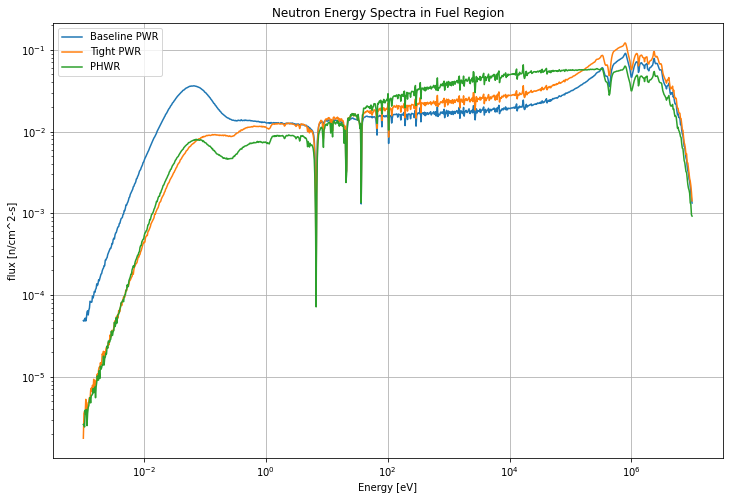

In [2]:
# set up energy bins
N = 1001
energy_bins = np.logspace(-3,7,num=N)
energy_x = 0.5*(energy_bins[0:-1]+energy_bins[1:])

sp_base = openmc.StatePoint('./baseline-pwr/statepoint.200.h5');
flux_base = sp_base.get_tally(name='flux');
flux_base_df = flux_base.get_pandas_dataframe();
flux_base_vals = flux_base_df['mean'].to_numpy();

sp_pwr_tight = openmc.StatePoint('./pwr-tight/statepoint.200.h5');
flux_pwrt = sp_pwr_tight.get_tally(name='flux');
flux_pwrt_df = flux_pwrt.get_pandas_dataframe();
flux_pwrt_vals = flux_pwrt_df['mean'].to_numpy();

sp_phwr = openmc.StatePoint('./phwr/statepoint.200.h5');
flux_phwr = sp_phwr.get_tally(name='flux');
flux_phwr_df = flux_phwr.get_pandas_dataframe();
flux_phwr_vals = flux_phwr_df['mean'].to_numpy();

plt.rcParams['figure.figsize']=[12,8];

plt.loglog(energy_x,flux_base_vals,label='Baseline PWR');
plt.loglog(energy_x,flux_pwrt_vals,label='Tight PWR');
plt.loglog(energy_x,flux_phwr_vals,label='PHWR');
plt.title('Neutron Energy Spectra in Fuel Region');
plt.legend();
plt.grid();
plt.xlabel('Energy [eV]');
plt.ylabel('flux [n/cm^2-s]');

